In [7]:
# Import pyroadacoustics package
import pyroadacoustics as pyroad

# Import auxiliary packages
import numpy as np
import scipy.signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
import IPython.display as ipd

In [2]:
# Sampling Frequency
fs = 48_000

# Atmospheric Parameters
T = 20
p = 1
h_rel = 50

env = pyroad.Environment(fs = fs, temperature = T, pressure = p, rel_humidity = h_rel)

In [3]:
# Define source signal
t = np.arange(0, 8, 1/fs)

# 1. Sinusoidal Signal
# f = 2_000
# src_signal = np.sin(2 * np.pi * f * t)

# 2. White noise signal
src_signal = np.random.randn(len(t))

# 3. Audio Signal from WAV file
# samplerate, data = wavfile.read('file_name_signal.wav')
# data = scipy.signal.resample(data, int(len(data) * fs / samplerate))    # Resample to fs
# # Take only first channel and normalize to max value
# data = np.reshape(data[:,0], (-1, 1))
# data = data / max(data)
# data = np.reshape(data, -1)


env.add_source(position = np.array([3,20,1]), signal=src_signal, trajectory_points=np.array([[3,20,1], [3,-20,1]]), source_velocity=np.array([5]))

In [4]:
# Add microphone array
mic_array = np.array([[0,0,1]])
env.add_microphone_array(mic_array)

# Add noise signal

# 1. Default white noise
# env.set_background_noise(SNR = 0)

# 2. User defined noise
# noise = np.random.randn(3*fs)
# b, a = scipy.signal.butter(3, 2000, 'lp', fs = fs)
# filtered_noise = scipy.signal.filtfilt(b, a, noise)
# env.set_background_noise(filtered_noise, SNR = 0)

# 3. Noise from WAV file
# samplerate, noise = wavfile.read('file_name_noise.wav')
# noise = scipy.signal.resample(noise, int(len(noise) * fs / samplerate))   # Resample to fs
# # Take only first channel and normalize to max value
# noise = np.reshape(noise[:,0], (-1, 1))
# noise = noise / max(noise)
# noise = np.reshape(noise, -1)
# env.set_background_noise(noise, SNR = 0)

In [5]:
interp_method = "Allpass"
include_reflection = True
include_air_absorption = True

env.set_simulation_params(interp_method, include_reflection, include_air_absorption)

In [ ]:
# Run simulation 
signal = env.simulate()


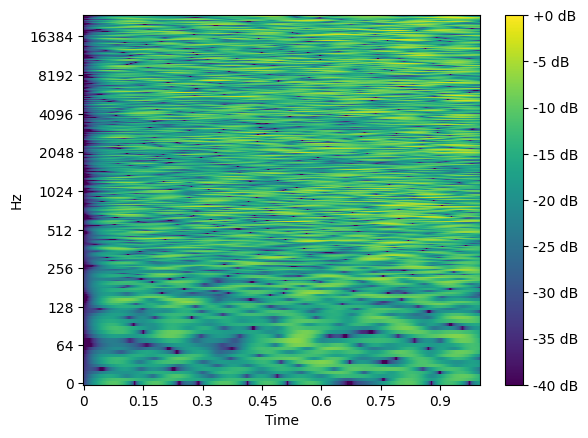

In [14]:
import librosa

ipd.display(ipd.Audio(signal[0], rate=fs))

n_fft=1024*8
hop_length = 512//8
D = librosa.amplitude_to_db(np.abs(librosa.stft(signal[0][:fs*1], n_fft=n_fft, hop_length=hop_length)), ref=np.max)
img = librosa.display.specshow(D, y_axis='log',
                               sr=fs,
                               n_fft=n_fft,
                               hop_length=hop_length,
                               x_axis='time',
                               cmap='viridis',
                               clim=(-40, 0)
                               )
plt.colorbar(format="%+2.f dB")
plt.show()

Text(0, 0.5, 'Frequency [Hz]')

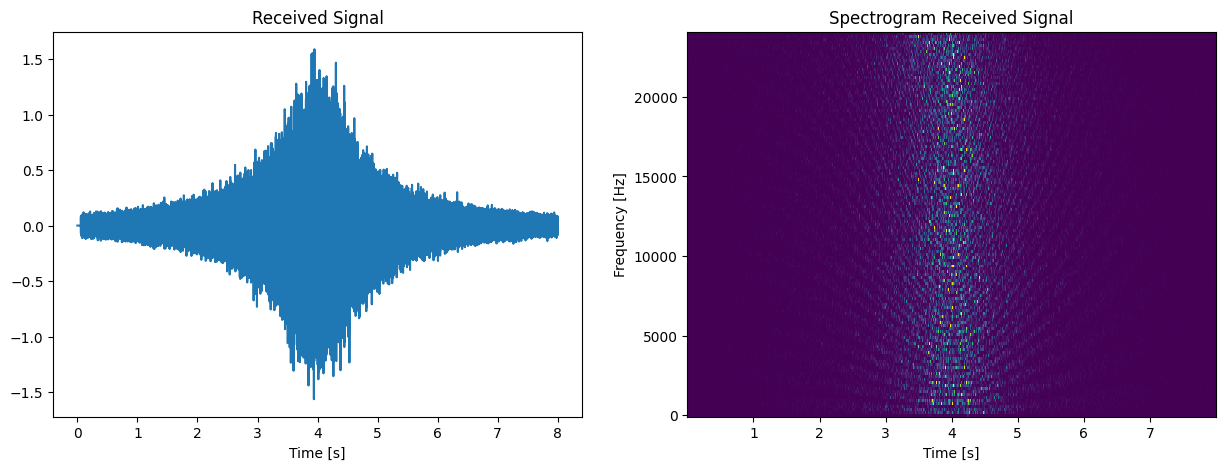

In [10]:

# Compute spectrogram of received signal
ff, tt, Sxx = scipy.signal.spectrogram(signal[0], fs = fs)

# Plots
fig, axs = plt.subplots(1,2, figsize = (15,5))

# preview
ipd.display(ipd.Audio(signal[0], rate=fs))

# Waveform Received Signal
axs[0].plot(np.arange(len(signal[0]))/fs, signal[0])
axs[0].set_title('Received Signal')
axs[0].set_xlabel('Time [s]')

# Spectrogram Received Signal
axs[1].pcolormesh(tt, ff, Sxx, shading='auto',
                  vmax = 0.00004,
                  rasterized=True)
axs[1].set_title('Spectrogram Received Signal')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Frequency [Hz]')